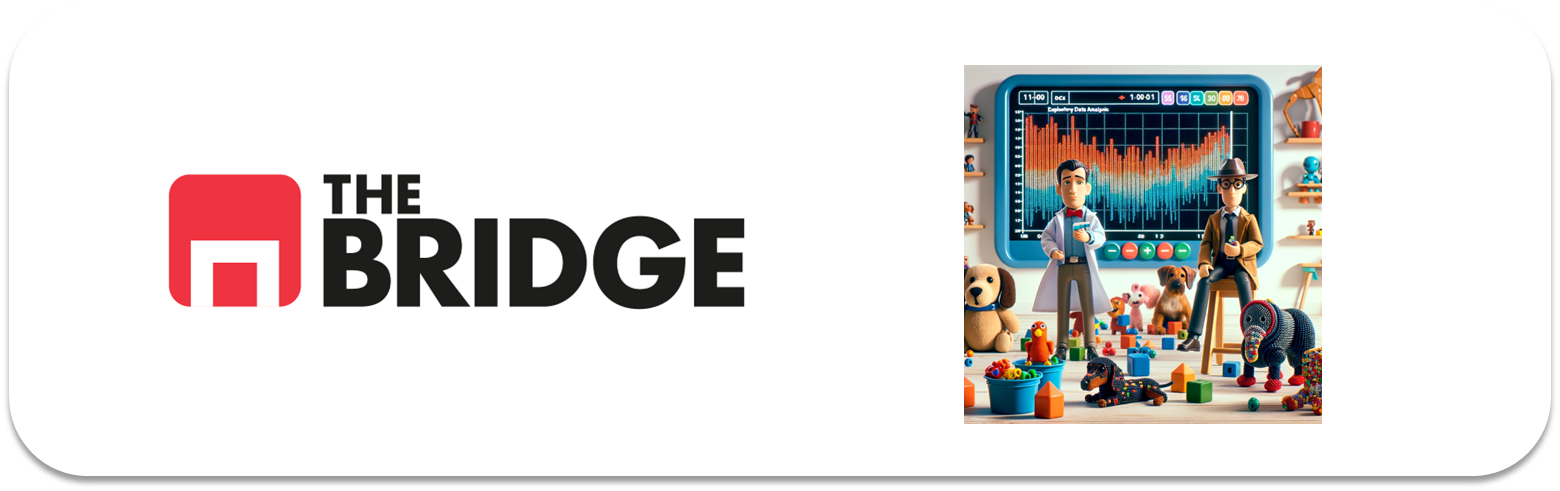

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency 
from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_combined_graphs,plot_grouped_histograms


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df = pd.read_csv('./data/titanic.csv')

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:

columnas_a_eliminar = ["deck", "survived", "pclass", "embarked"]
df = df.drop(columns=columnas_a_eliminar)
print(df.head())


      sex   age  sibsp  parch     fare  class    who  adult_male  embark_town  \
0    male  22.0      1      0   7.2500  Third    man        True  Southampton   
1  female  38.0      1      0  71.2833  First  woman       False    Cherbourg   
2  female  26.0      0      0   7.9250  Third  woman       False  Southampton   
3  female  35.0      1      0  53.1000  First  woman       False  Southampton   
4    male  35.0      0      0   8.0500  Third    man        True  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:

df['family_members'] = df['parch'] + df['sibsp']
df = df.drop(columns=["parch", "sibsp"])
print(df.head())


      sex   age     fare  class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500  Third    man        True  Southampton    no  False   
1  female  38.0  71.2833  First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250  Third  woman       False  Southampton   yes   True   
3  female  35.0  53.1000  First  woman       False  Southampton   yes  False   
4    male  35.0   8.0500  Third    man        True  Southampton    no   True   

   family_members  
0               1  
1               1  
2               0  
3               1  
4               0  


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
moda_embark_town = df['embark_town'].mode()[0] 
df['embark_town'] = df['embark_town'].fillna(moda_embark_town)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [6]:
# Calcular la media de la edad para cada grupo en "who"
mean_age_by_who = df.groupby('who')['age'].transform(lambda x: x.fillna(x.mean()))

# Imputar la media de la edad considerando la columna "who"
df['age'] = mean_age_by_who

# Mostrar las primeras filas del DataFrame resultante
print(df.head())

      sex   age     fare  class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500  Third    man        True  Southampton    no  False   
1  female  38.0  71.2833  First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250  Third  woman       False  Southampton   yes   True   
3  female  35.0  53.1000  First  woman       False  Southampton   yes  False   
4    male  35.0   8.0500  Third    man        True  Southampton    no   True   

   family_members  
0               1  
1               1  
2               0  
3               1  
4               0  


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

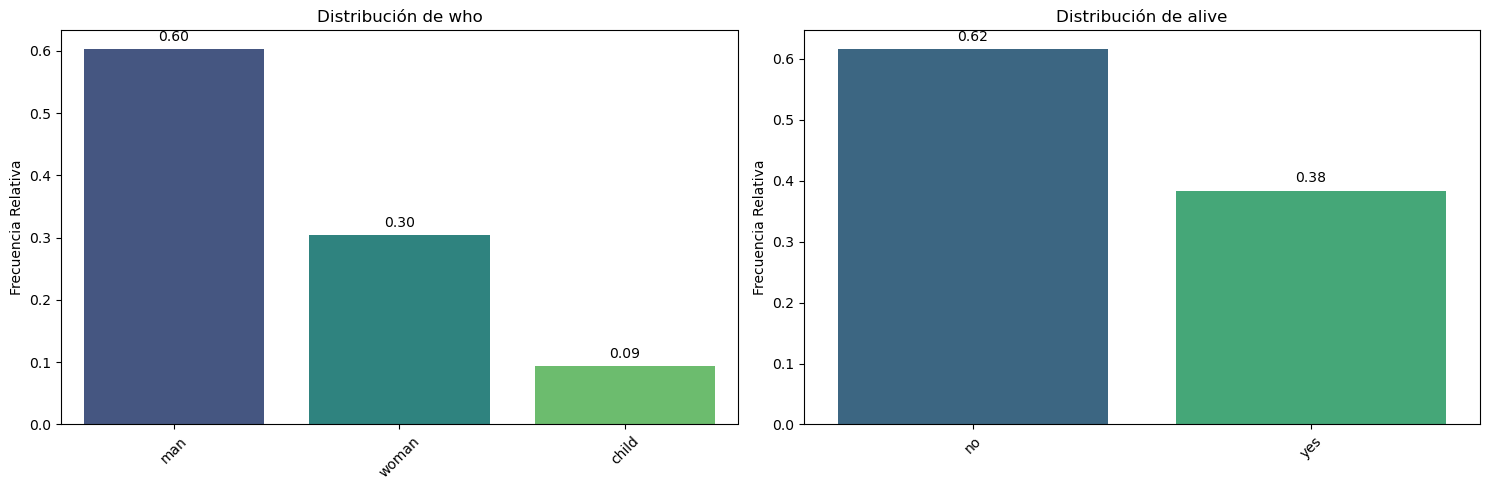

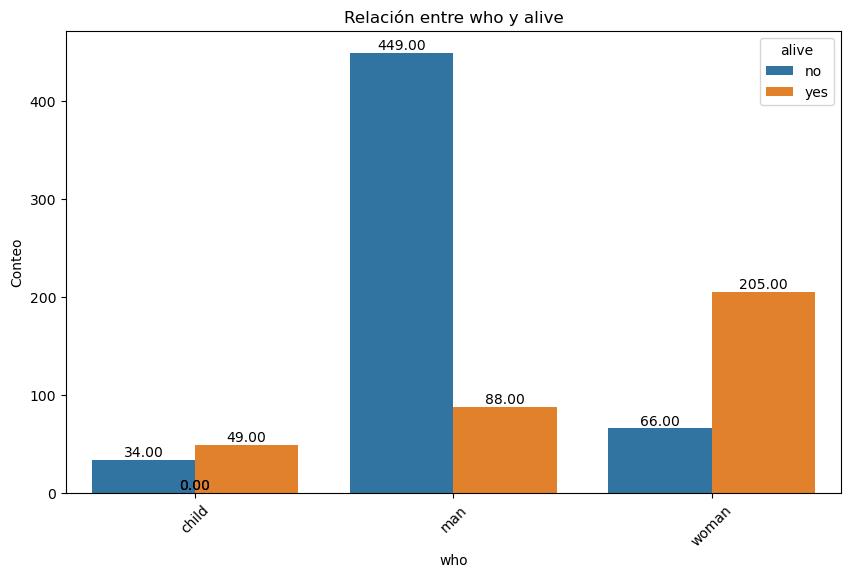

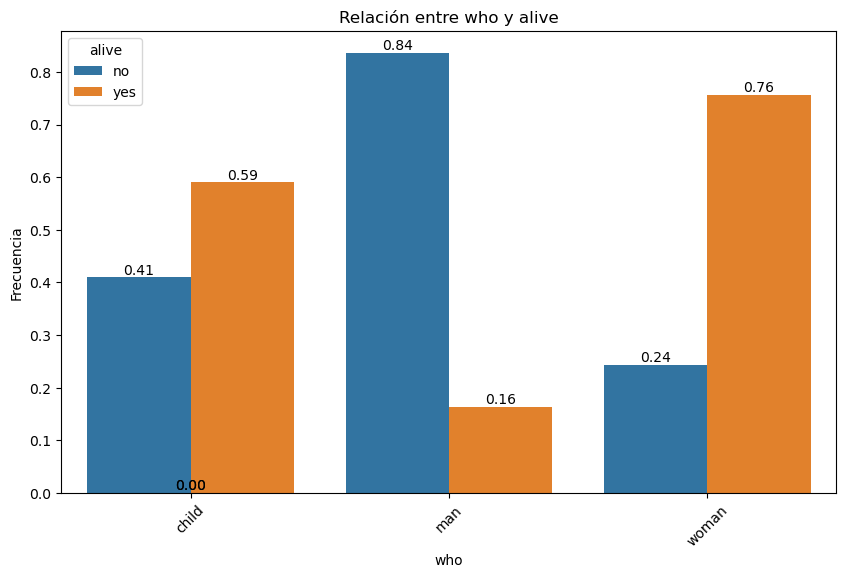

Valor Chi-Cuadrado 283.923050324233
P-Value 2.2227620817798914e-62
Grados de Libertad 2
Tabla de Frecuencias Esperadas: [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]
      sex   age     fare  class    who  adult_male  embark_town alive  alone  \
0    male  22.0   7.2500  Third    man        True  Southampton    no  False   
1  female  38.0  71.2833  First  woman       False    Cherbourg   yes  False   
2  female  26.0   7.9250  Third  woman       False  Southampton   yes   True   
3  female  35.0  53.1000  First  woman       False  Southampton   yes  False   
4    male  35.0   8.0500  Third    man        True  Southampton    no   True   

   family_members age_group  
0               1     adult  
1               1     adult  
2               0     adult  
3               1     adult  
4               0     adult  


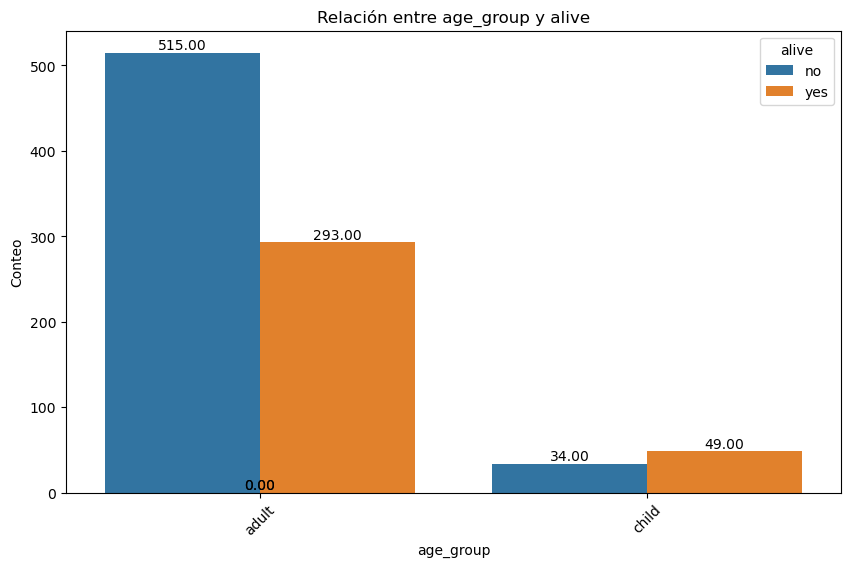

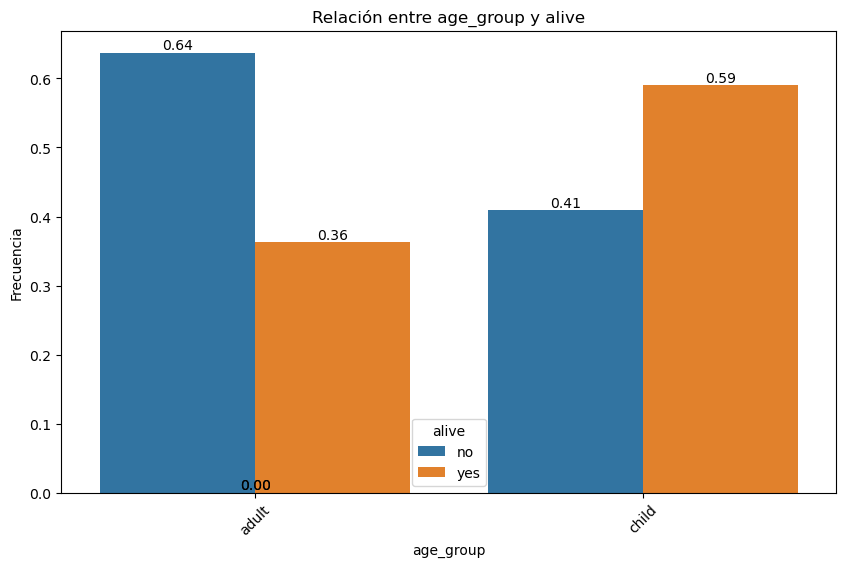

Valor Chi-Cuadrado 15.556993340077092
P-Value 8.005497211300105e-05
Grados de Libertad 1
Tabla de Frecuencias Esperadas: [[497.85858586 310.14141414]
 [ 51.14141414  31.85858586]]


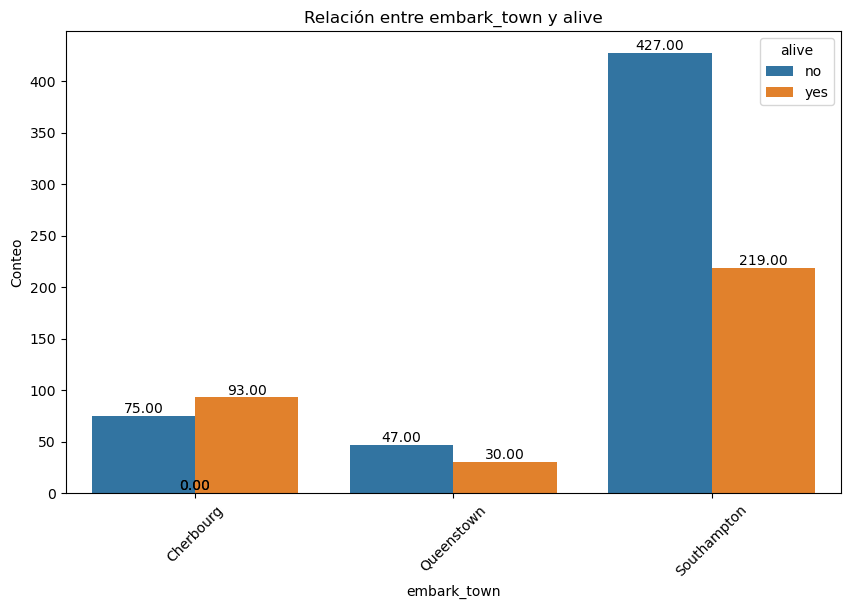

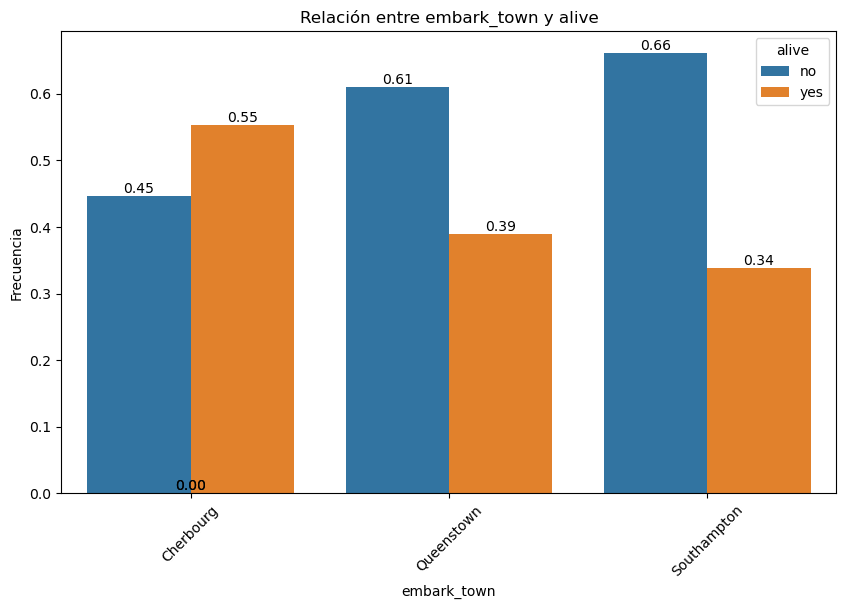

KeyError: 'embark_townp'

In [8]:
# 1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?
pinta_distribucion_categoricas(df,["who","alive"], relativa=True, mostrar_valores=True)
plot_categorical_relationship_fin(df,"who","alive", show_values=True)
plot_categorical_relationship_fin(df,"who","alive",relative_freq=True, show_values=True)
tabla_contingencia_who_alive=pd.crosstab(df["who"],df["alive"])
tabla_contingencia_who_alive
chi2,p,dof,expected=chi2_contingency(tabla_contingencia_who_alive)
print("Valor Chi-Cuadrado",chi2)
print("P-Value",p)
print("Grados de Libertad",dof)
print("Tabla de Frecuencias Esperadas:", expected)
# Con este chi2 rechazamos la hipotesis nula por lo que hay relacion  entre el genero y supervivientes
# 2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?
# Crear una nueva columna "age_group" que diferencie entre niños y adultos
df['age_group'] = df['who'].apply(lambda x: 'adult' if x in ['man', 'woman'] else 'child')
print(df.head())
plot_categorical_relationship_fin(df,"age_group","alive",show_values=True)
plot_categorical_relationship_fin(df,"age_group","alive",relative_freq=True,show_values=True)
tabla_contingencia_who_age_group=pd.crosstab(df["age_group"],df["alive"])
tabla_contingencia_who_age_group
chi2,p,dof,expected=chi2_contingency(tabla_contingencia_who_age_group)
print("Valor Chi-Cuadrado",chi2)
print("P-Value",p)
print("Grados de Libertad",dof)
print("Tabla de Frecuencias Esperadas:", expected)
# Con este chi2 rechazamos la hipotesis nula por lo que hay relacion  entre clase y supervivientes
# 3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
plot_categorical_relationship_fin(df,"embark_town","alive",show_values=True)
plot_categorical_relationship_fin(df,"embark_town","alive",relative_freq=True,show_values=True)
tabla_contingencia_embark_town_alive=pd.crosstab(df["embark_townp"],df["alive"])
tabla_contingencia_embark_town_alive
chi2,p,dof,expected=chi2_contingency(tabla_contingencia_embark_town_alive)
print("Valor Chi-Cuadrado",chi2)
print("P-Value",p)
print("Grados de Libertad",dof)
print("Tabla de Frecuencias Esperadas:", expected)
# Con este chi2 rechazamos la hipotesis nula por lo que hay relacion  entre ciudad y supervivientes
# 4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?
plot_combined_graphs(df,["fare"])
plot_grouped_histograms(df, cat_col="alive",num_col="fare")
# 5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

# 6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

# 7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

# 8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?df['age_group'] = df['who'].apply(lambda x: 'adult' if x in ['man', 'woman'] else 'child')



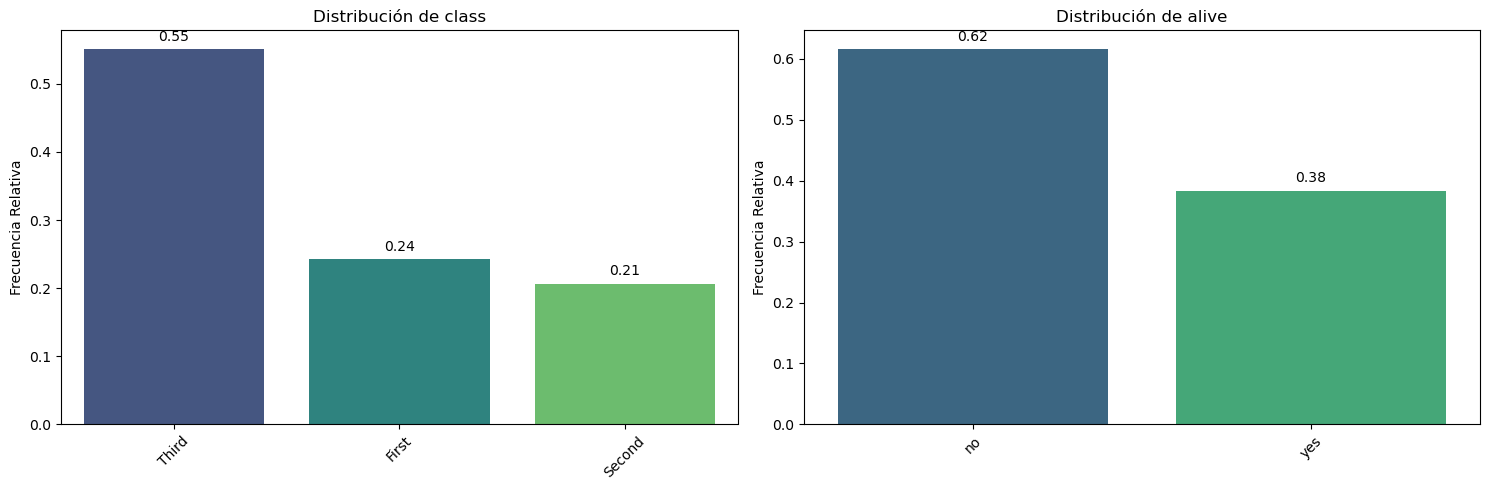

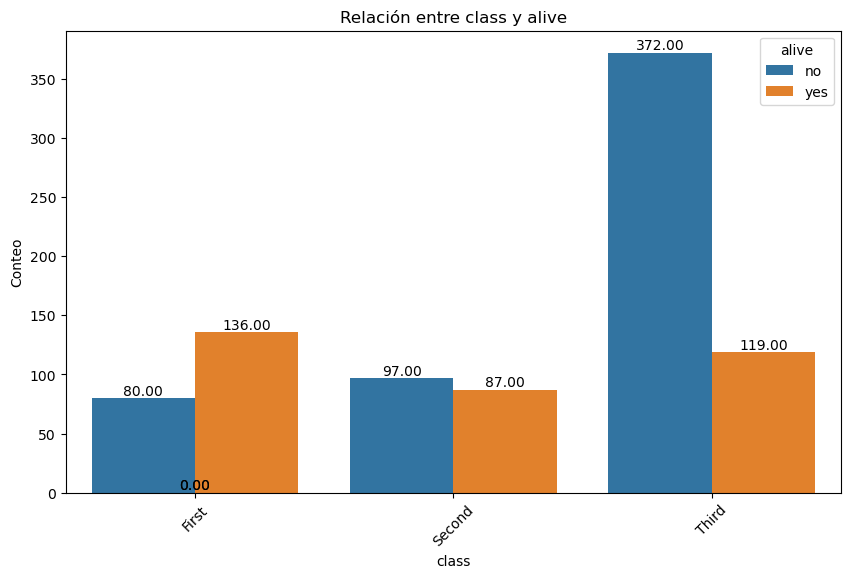

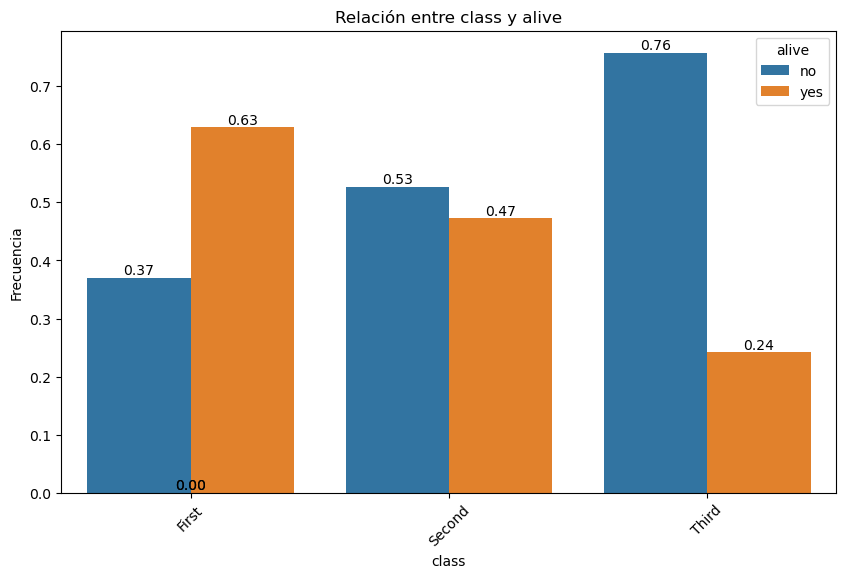

Valor Chi-Cuadrado 102.88898875696056
P-Value 4.549251711298793e-23
Grados de Libertad 2
Tabla de Frecuencias Esperadas: [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [ ]:
pinta_distribucion_categoricas(df,["class","alive"], relativa=True, mostrar_valores=True)
plot_categorical_relationship_fin(df,"class","alive", show_values=True)
plot_categorical_relationship_fin(df,"class","alive",relative_freq=True, show_values=True)
tabla_contingencia_class_alive=pd.crosstab(df["class"],df["alive"])
tabla_contingencia_class_alive
chi2,p,dof,expected=chi2_contingency(tabla_contingencia_class_alive)
print("Valor Chi-Cuadrado",chi2)
print("P-Value",p)
print("Grados de Libertad",dof)
print("Tabla de Frecuencias Esperadas:", expected)


1. Supervivencia por género y edad (niños/adultos)
Supervivientes absolutos por género:
 sex
female    233
male      109
Name: count, dtype: int64
Supervivientes relativos por género (%):
 sex
female    74.203822
male      18.890815
Name: count, dtype: float64
Supervivientes absolutos por edad:
 who
woman    205
man       88
child     49
Name: count, dtype: int64
Supervivientes relativos por edad (%):
 who
child    59.036145
man      16.387337
woman    75.645756
Name: count, dtype: float64
Chi-cuadrado para género y supervivencia: p-value = 1.1973570627755645e-58
Chi-cuadrado para edad y supervivencia: p-value = 2.2227620817798914e-62

2. Supervivencia por clase
Supervivientes absolutos por clase:
 class
First     136
Third     119
Second     87
Name: count, dtype: int64
Supervivientes relativos por clase (%):
 class
First     62.962963
Second    47.282609
Third     24.236253
Name: count, dtype: float64
Chi-cuadrado para clase y supervivencia: p-value = 4.549251711298793e-23

3. Superv

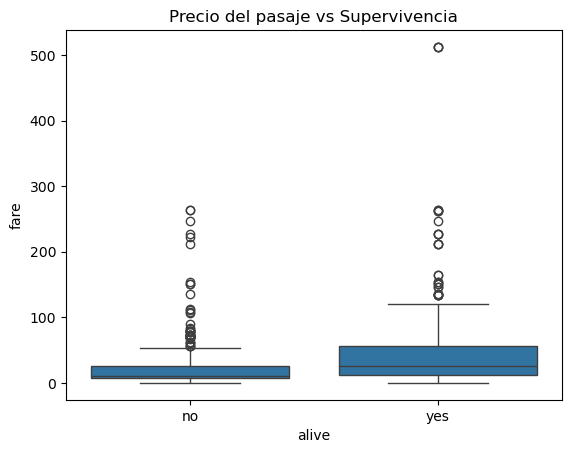


5. Pasajeros que no pagaron billete
      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  33.173123   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  33.173123   0.0  Second  man        True  Southampton    no   True   
466  male  33.173123   0.0  Second  man        True  Southampton    no   True   
481  male  33.173123   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  33.173123   0.0   First  man        True  Southampton    no   True   
674  male  33.173123   0.0  Second  man        True  Southampton    no  

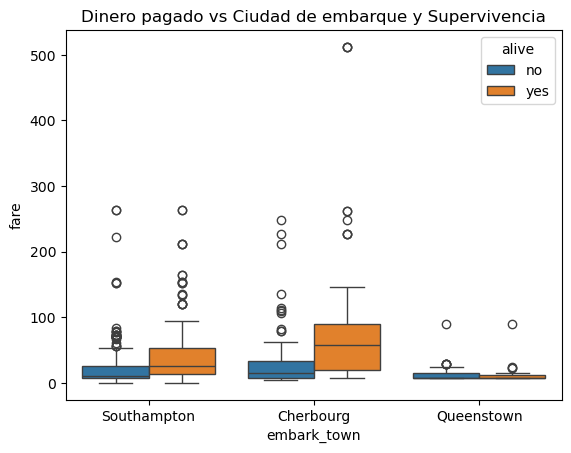


7. Relación entre clase, edad y supervivencia


c:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.9% of the points cannot

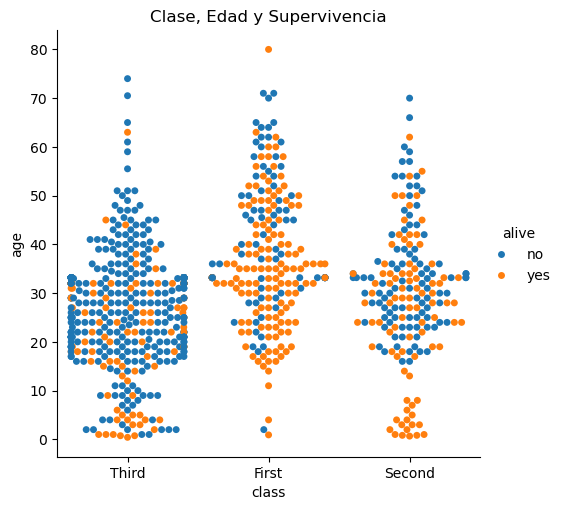


8. Relación entre edad, coste del billete y supervivencia


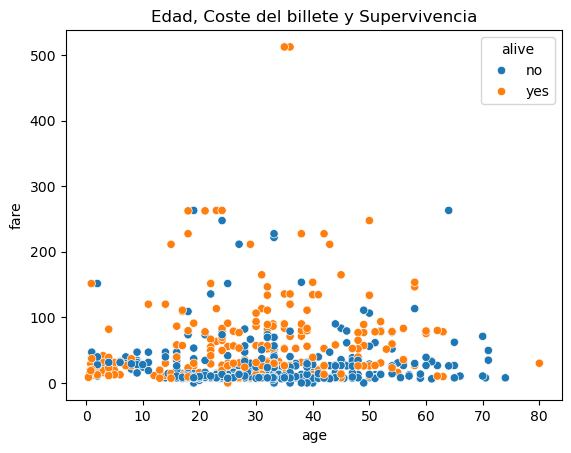

In [ ]:

# 1. Análisis de supervivencia por género y edad (niños/adultos)
print("1. Supervivencia por género y edad (niños/adultos)")
supervivientes_genero = df[df['alive'] == 'yes']['sex'].value_counts()
total_genero = df['sex'].value_counts()
relativo_genero = (supervivientes_genero / total_genero) * 100
print("Supervivientes absolutos por género:\n", supervivientes_genero)
print("Supervivientes relativos por género (%):\n", relativo_genero)

supervivientes_edad = df[df['alive'] == 'yes']['who'].value_counts()
total_edad = df['who'].value_counts()
relativo_edad = (supervivientes_edad / total_edad) * 100
print("Supervivientes absolutos por edad:\n", supervivientes_edad)
print("Supervivientes relativos por edad (%):\n", relativo_edad)

# Test chi-cuadrado para género y supervivencia
tabla_contingencia_genero = pd.crosstab(df['sex'], df['alive'])
chi2_genero, p_genero, _, _ = chi2_contingency(tabla_contingencia_genero)
print("Chi-cuadrado para género y supervivencia: p-value =", p_genero)

# Test chi-cuadrado para edad (niños/adultos) y supervivencia
tabla_contingencia_edad = pd.crosstab(df['who'], df['alive'])
chi2_edad, p_edad, _, _ = chi2_contingency(tabla_contingencia_edad)
print("Chi-cuadrado para edad y supervivencia: p-value =", p_edad)

# 2. Análisis de supervivencia por clase
print("\n2. Supervivencia por clase")
supervivientes_clase = df[df['alive'] == 'yes']['class'].value_counts()
total_clase = df['class'].value_counts()
relativo_clase = (supervivientes_clase / total_clase) * 100
print("Supervivientes absolutos por clase:\n", supervivientes_clase)
print("Supervivientes relativos por clase (%):\n", relativo_clase)

# Test chi-cuadrado para clase y supervivencia
tabla_contingencia_clase = pd.crosstab(df['class'], df['alive'])
chi2_clase, p_clase, _, _ = chi2_contingency(tabla_contingencia_clase)
print("Chi-cuadrado para clase y supervivencia: p-value =", p_clase)

# 3. Análisis de supervivencia por ciudad de embarque
print("\n3. Supervivencia por ciudad de embarque")
supervivientes_ciudad = df[df['alive'] == 'yes']['embark_town'].value_counts()
total_ciudad = df['embark_town'].value_counts()
relativo_ciudad = (supervivientes_ciudad / total_ciudad) * 100
print("Supervivientes absolutos por ciudad:\n", supervivientes_ciudad)
print("Supervivientes relativos por ciudad (%):\n", relativo_ciudad)

# Test chi-cuadrado para ciudad de embarque y supervivencia
tabla_contingencia_ciudad = pd.crosstab(df['embark_town'], df['alive'])
chi2_ciudad, p_ciudad, _, _ = chi2_contingency(tabla_contingencia_ciudad)
print("Chi-cuadrado para ciudad de embarque y supervivencia: p-value =", p_ciudad)

# 4. Relación entre precio del pasaje y supervivencia/fallecimiento
print("\n4. Relación entre precio del pasaje y supervivencia")
sns.boxplot(x='alive', y='fare', data=df)
plt.title('Precio del pasaje vs Supervivencia')
plt.show()

# 5. Pasajeros que no pagaron billete y el que más pagó
print("\n5. Pasajeros que no pagaron billete")
sin_pago = df[df['fare'] == 0]
print(sin_pago)

print("\nPasajero que más pagó")
mas_pago = df[df['fare'] == df['fare'].max()]
print(mas_pago)

# 6. Relación entre dinero pagado, ciudad de embarque y supervivencia
print("\n6. Relación entre dinero pagado, ciudad de embarque y supervivencia")
sns.boxplot(x='embark_town', y='fare', hue='alive', data=df)
plt.title('Dinero pagado vs Ciudad de embarque y Supervivencia')
plt.show()

# 7. Relación entre clase, edad y supervivencia
print("\n7. Relación entre clase, edad y supervivencia")
sns.catplot(x='class', y='age', hue='alive', kind='swarm', data=df)
plt.title('Clase, Edad y Supervivencia')
plt.show()

# 8. Relación entre edad, coste del billete y supervivencia
print("\n8. Relación entre edad, coste del billete y supervivencia")
sns.scatterplot(x='age', y='fare', hue='alive', data=df)
plt.title('Edad, Coste del billete y Supervivencia')
plt.show()


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.